# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use(['ggplot'])

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [5]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [6]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [8]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

## Data Cleaning

In [9]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
df.duplicated().sum()

719

In [11]:
# Drop the duplicates -->
df.drop_duplicates(inplace=True)

### Outliers

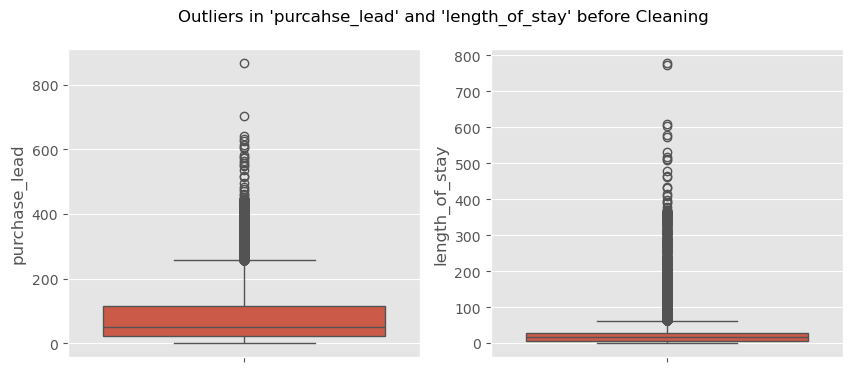

In [12]:
# finding outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

plt1 = sns.boxplot(y='purchase_lead', data=df, ax=axs[0])
plt1 = sns.boxplot(y='length_of_stay', data=df, ax=axs[1])

plt.suptitle("Outliers in 'purcahse_lead' and 'length_of_stay' before Cleaning")
plt.show()

In [13]:
# a function that cleans the Outliers.
def outliers(array):
    '''This method calculates the upper and lower limits and finds outliers in an attribute
    of the dataset passed as an array.
    It further trims/caps the outliers to their respective lower or upper limits.'''

    '''Calculating the upper and the lower limit of the attribute.'''
    iqr = array.quantile(0.75) - array.quantile(0.25)
    lower_limit = array.quantile(0.25) - (1.5 * iqr)
    upper_limit = array.quantile(0.75) + (1.5 * iqr)
    
    '''Trimming the outlier.'''
    '''Creating a new_array with trimmed outliers.'''
    new_array = []
    for i in array:
        if i < lower_limit:
            i = lower_limit
        elif i > upper_limit:
            i = upper_limit
        new_array.append(i)
    '''returning an array with trimmed outliers'''
    return np.array(new_array)

In [14]:
df['purchase_lead'] = outliers(df['purchase_lead'])
df['length_of_stay'] = outliers(df['length_of_stay'])

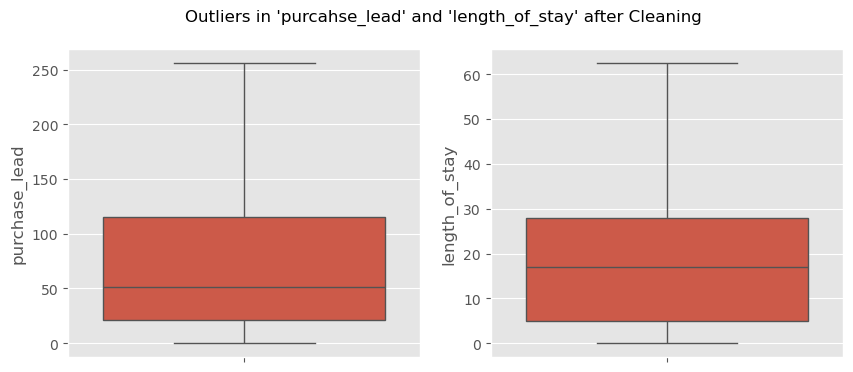

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

plt1 = sns.boxplot(y='purchase_lead', data=df, ax=axs[0])
plt1 = sns.boxplot(y='length_of_stay', data=df, ax=axs[1])

plt.suptitle("Outliers in 'purcahse_lead' and 'length_of_stay' after Cleaning")
plt.show()

## Feature Extraction

In [16]:
# Feature engineering
# Adding a new feature in place of the "booking_origin" attribute, which is, booking_origin_max

df['booking_origin_max'] = df[['booking_origin', 'booking_complete']].groupby(by=['booking_origin']).transform("sum")

In [17]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_max
0,2,Internet,RoundTrip,256.0,19.0,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,53
1,1,Internet,RoundTrip,112.0,20.0,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,53
2,2,Internet,RoundTrip,243.0,22.0,17,Wed,AKLDEL,India,1,1,0,5.52,0,128
3,1,Internet,RoundTrip,96.0,31.0,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,53
4,2,Internet,RoundTrip,68.0,22.0,15,Wed,AKLDEL,India,1,0,1,5.52,0,128


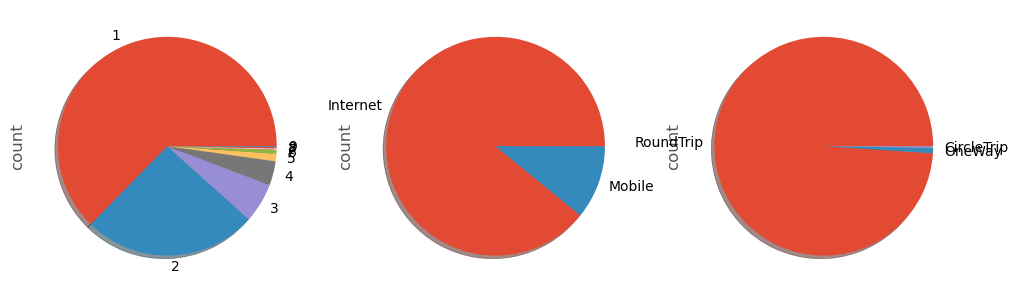

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
df['num_passengers'].value_counts().plot(kind='pie', shadow=True)
plt.subplot(1, 3, 2)
df['sales_channel'].value_counts().plot(kind='pie', shadow=True)
plt.subplot(1, 3, 3)
df['trip_type'].value_counts().plot(kind='pie', shadow=True)
plt.show()

In [19]:
df['booking_complete'].value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

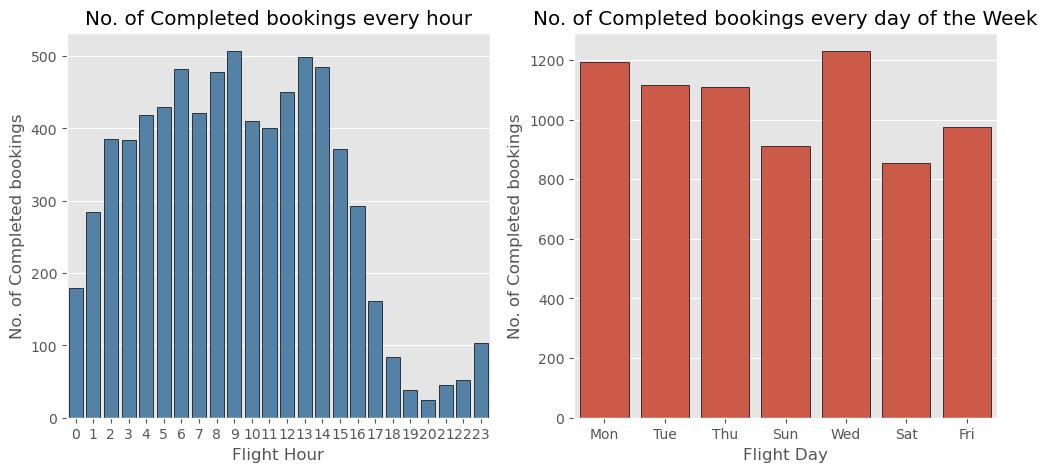

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=df[df['booking_complete'] == 1]['flight_hour'], color='steelblue', edgecolor='black')
plt.title("No. of Completed bookings every hour")
plt.xlabel("Flight Hour")
plt.ylabel("No. of Completed bookings")

plt.subplot(1, 2, 2)
sns.countplot(x=df[df['booking_complete'] == 1]['flight_day'], edgecolor='black')
plt.title("No. of Completed bookings every day of the Week")
plt.xlabel("Flight Day")
plt.ylabel("No. of Completed bookings")

plt.show()

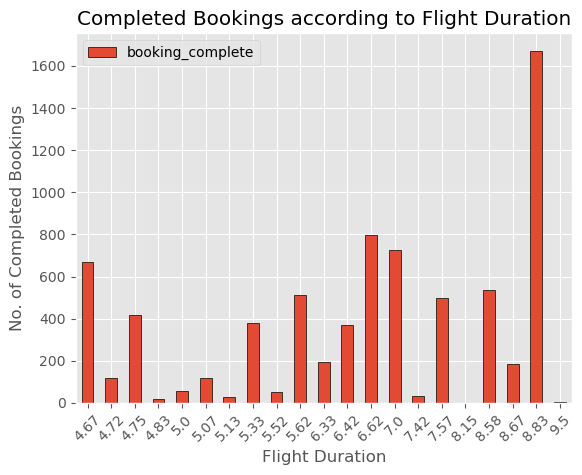

In [21]:
df[['flight_duration', 'booking_complete']].groupby(['flight_duration']).sum().plot(kind='bar', edgecolor='black')
plt.title("Completed Bookings according to Flight Duration")
plt.xlabel("Flight Duration")
plt.ylabel("No. of Completed Bookings")
plt.xticks(rotation=45)
plt.show()

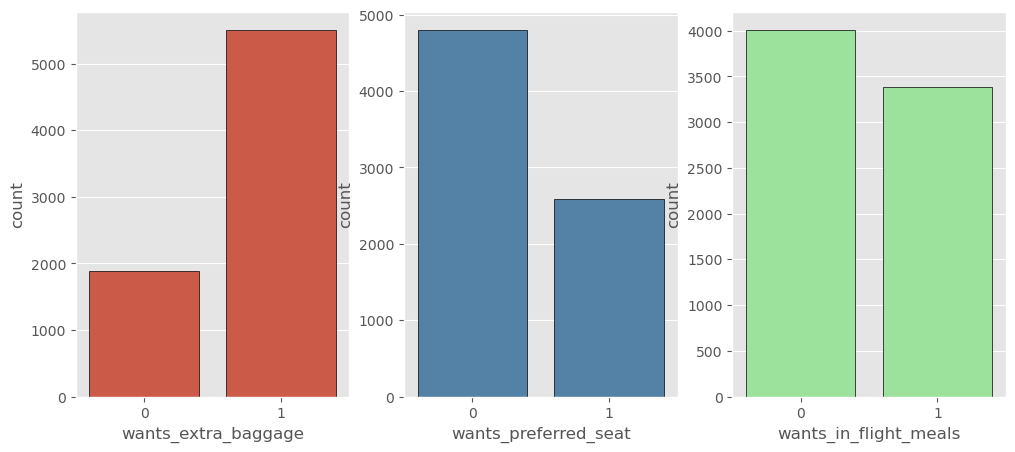

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.countplot(x=df[df['booking_complete'] == 1]['wants_extra_baggage'], edgecolor='black')

plt.subplot(1,3,2)
sns.countplot(x=df[df['booking_complete'] == 1]['wants_preferred_seat'], edgecolor='black', color='steelblue')

plt.subplot(1,3,3)
sns.countplot(x=df[df['booking_complete'] == 1]['wants_in_flight_meals'], edgecolor='black', color='lightgreen')

plt.show()

## Label Encoding

In [23]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_max
0,2,Internet,RoundTrip,256.0,19.0,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,53
1,1,Internet,RoundTrip,112.0,20.0,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,53
2,2,Internet,RoundTrip,243.0,22.0,17,Wed,AKLDEL,India,1,1,0,5.52,0,128
3,1,Internet,RoundTrip,96.0,31.0,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,53
4,2,Internet,RoundTrip,68.0,22.0,15,Wed,AKLDEL,India,1,0,1,5.52,0,128


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sales_channel'] = le.fit_transform(df['sales_channel'])
df['trip_type'] = le.fit_transform(df['trip_type'])
df['flight_day'] = le.fit_transform(df['flight_day'])

In [25]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_max
0,2,0,2,256.0,19.0,7,2,AKLDEL,New Zealand,1,0,0,5.52,0,53
1,1,0,2,112.0,20.0,3,2,AKLDEL,New Zealand,0,0,0,5.52,0,53
2,2,0,2,243.0,22.0,17,6,AKLDEL,India,1,1,0,5.52,0,128
3,1,0,2,96.0,31.0,4,2,AKLDEL,New Zealand,0,0,1,5.52,0,53
4,2,0,2,68.0,22.0,15,6,AKLDEL,India,1,0,1,5.52,0,128


In [26]:
df_cleaned = df.select_dtypes(['int32', 'int64', 'float32', 'float64'])
df_cleaned.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_max
0,2,0,2,256.0,19.0,7,2,1,0,0,5.52,0,53
1,1,0,2,112.0,20.0,3,2,0,0,0,5.52,0,53
2,2,0,2,243.0,22.0,17,6,1,1,0,5.52,0,128
3,1,0,2,96.0,31.0,4,2,0,0,1,5.52,0,53
4,2,0,2,68.0,22.0,15,6,1,0,1,5.52,0,128


## Feature Selection

In [27]:
df_cleaned.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'booking_origin_max'],
      dtype='object')

In [28]:
X = df_cleaned[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
        'booking_origin_max']]
y = df_cleaned['booking_complete']

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ranked_features = SelectKBest(score_func=chi2, k=12)
ranked_features.fit(X, y)

SelectKBest(k=12, score_func=<function chi2 at 0x0000022E85369AB0>)

In [30]:
ranked_features.scores_

array([1.85878282e+01, 6.78968737e+01, 3.14704463e-01, 2.19336443e+03,
       4.47120030e+03, 7.15692801e+00, 6.51645102e+00, 7.66104680e+01,
       8.74388032e+01, 1.96917844e+01, 1.72013934e+02, 7.53393612e+05])

In [31]:
features_rank = pd.DataFrame({
    "Feature": X.columns,
    "Score": ranked_features.scores_.round(2)
})

In [32]:
features_rank.sort_values(by=['Score'], ascending=False, inplace=True)

In [33]:
features_rank

,Feature,Score
11,booking_origin_max,753393.61
4,length_of_stay,4471.20
3,purchase_lead,2193.36
10,flight_duration,172.01
8,wants_preferred_seat,87.44
7,wants_extra_baggage,76.61
1,sales_channel,67.90
9,wants_in_flight_meals,19.69
0,num_passengers,18.59
5,flight_hour,7.16


<Axes: xlabel='Score', ylabel='Feature'>

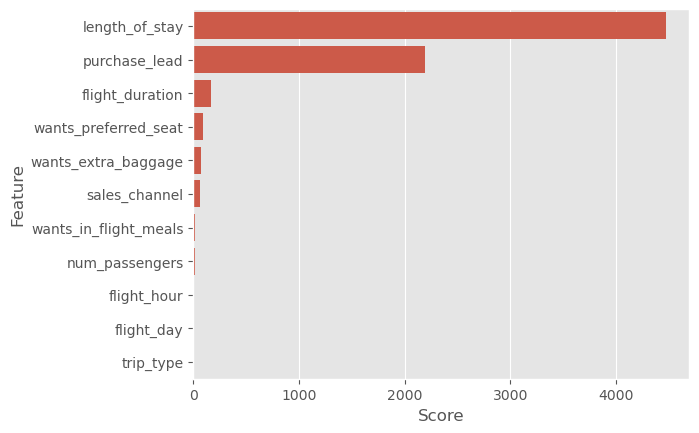

In [50]:
sns.barplot(x='Score', y='Feature', data=features_rank[features_rank['Feature'] != 'booking_origin_max'])

Since, flight_hour, flight_day and trip_type are the Features with least Scores and therefore significance. we can safely drop these attributes from the data.

In [34]:
X = X.drop(['flight_hour', 'flight_day', 'trip_type'], axis=1)

## Data Preprocessing

In [35]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Modelling

In [37]:
# Accuracy Method.
from sklearn.metrics import accuracy_score, confusion_matrix
def accuracy(X, y, model):
    '''This Method calculates accuracy score and Confusion matrix based on 
    given inputs and target.'''
    y_pred = model.predict(X)
    print(confusion_matrix(y_pred, y))
    print(accuracy_score(y_pred, y))

In [38]:
# K-Fold Cross Validation.
from sklearn.model_selection import cross_val_score
def k_fold_cross_val(model, X, y):
    '''This Method is used to calculate the mean accuracy and the std.dev. using 
    k Fold cross validation.'''
    accuracies = cross_val_score(estimator=model, X=X, y=y, cv=10)
    print("Mean Accuracy: ", (accuracies.mean()*100).round(2), "%")
    print("Standard Deviation: ", (accuracies.std()*100).round(2), "%")

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
# accuracy on the train set
accuracy(X_train, y_train, lr)

[[33457  5849]
 [   56    62]]
0.8502181412337663


In [41]:
# Accuracy on the Test Set.
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, lr)

[[8363 1462]
 [  14   18]]
0.8502586994014406


In [42]:
k_fold_cross_val(lr, X_train, y_train)

Mean Accuracy:  85.04 %
Standard Deviation:  0.1 %


In [43]:
k_fold_cross_val(lr, X_test, y_test)

Mean Accuracy:  85.0 %
Standard Deviation:  0.23 %


In [44]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [45]:
accuracy(X_train, y_train, rfc)

[[33357   977]
 [  156  4934]]
0.9712611607142857


In [46]:
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, rfc)

[[7947 1259]
 [ 430  221]]
0.8286496905752258


In [47]:
k_fold_cross_val(rfc, X_train, y_train)

Mean Accuracy:  82.92 %
Standard Deviation:  0.4 %
